# **Showcasing the preprocessed data for each client**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## **Client 1**

In [43]:
# Load datasets
client_1 = pd.read_csv("MIMIC_data_handler/client_1_static.csv", low_memory=False)
client_2 = pd.read_csv("eICU_data_handler/client_2_static.csv", low_memory=False)

In [44]:
def plot_pie_chart(series, figsize=(5, 5), filename='pie_chart.png'):
    counts = series.value_counts(dropna=False)
    labels = counts.index.astype(str)
    sizes = counts.values

    fig, ax = plt.subplots(figsize=figsize)

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        textprops=dict(color="black"),
        counterclock=False
    )

    ax.set_aspect('equal') 
    plt.savefig(filename, dpi=300)
    plt.show()

### PLOTTING:

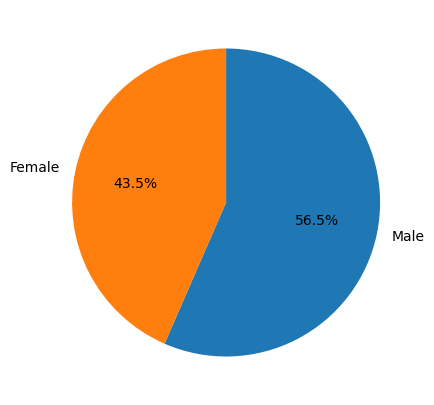

In [45]:
if 'gender' in client_1.columns:
    gender_filtered = client_1[client_1['gender'].isin([0, 1])]
    plot_pie_chart(
        gender_filtered['gender'].map({0: 'Male', 1: 'Female'}),
        figsize=(5, 5),
        filename="gender_c1.png"
    )
else:
    print("Column 'gender' not found.")

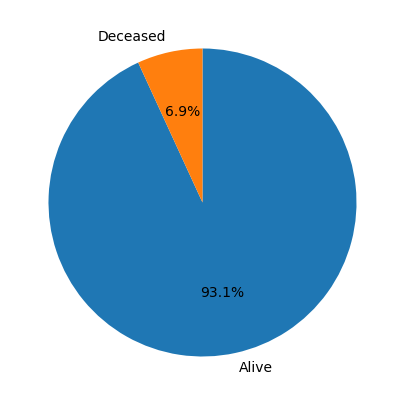

In [46]:
if 'is_alive' in client_1.columns:
    plot_pie_chart(client_1['is_alive'].map({0: 'Deceased', 1: 'Alive'}), figsize=(5, 5), filename="is_alive_c1.png")
else:
    print("Column not found")

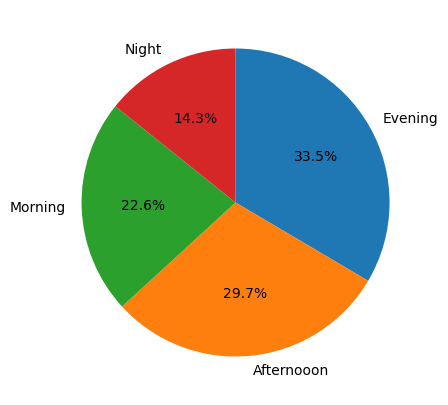

In [47]:
if 'admit_hour' in client_1.columns:
    hour_bins = pd.cut(client_1['admit_hour'], bins=[0, 6, 12, 18, 24],
                       labels=['Night', 'Morning', 'Afternooon', 'Evening'],
                       right=False)

    plot_pie_chart(hour_bins, figsize=(5, 5), filename="admission_c1.png")
else:
    print("Column 'admit_hour' not found.")

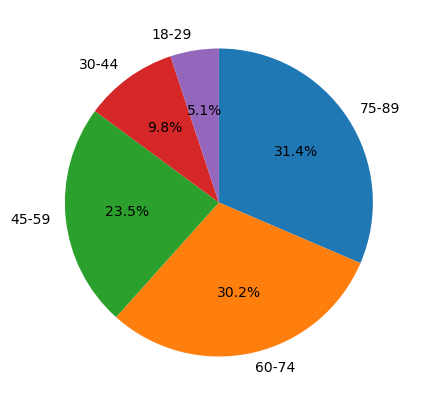

In [48]:
client_1 = client_1.rename(columns={'age_at_admit': 'age'})

if 'age' in client_1.columns:
    # Ensure age is numeric
    client_1['age'] = pd.to_numeric(client_1['age'], errors='coerce')

    # Define age bins and labels
    age_bins = [18, 30, 45, 60, 75, float('inf')]
    age_labels = ['18-29', '30-44', '45-59', '60-74', '75-89']

    # Create age groups
    client_1['age_group'] = pd.cut(client_1['age'], bins=age_bins, labels=age_labels, right=False)

    # Call pie chart function
    plot_pie_chart(client_1['age_group'].dropna(), figsize=(5, 5), filename="age_c1.png")

else:
    print("Column 'age' not found.")

## **Client 2**

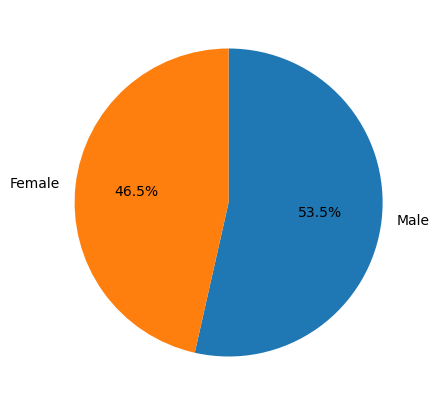

In [49]:
client_2_filtered = client_2[client_2['gender'] != -1]

if 'gender' in client_2_filtered.columns:
    plot_pie_chart(client_2_filtered['gender'].map({0: 'Male', 1: 'Female'}).dropna(), figsize=(5,5), filename="gender_c2")
else:
    print("Column 'gender' not found.")

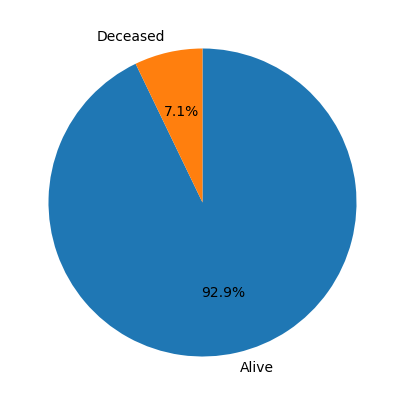

In [50]:
if 'is_alive' in client_2.columns:
    series_to_plot = client_2.loc[client_2['is_alive'].isin([0, 1]), 'is_alive']
    
    if not series_to_plot.empty:
        mapped_series = series_to_plot.map({0: 'Deceased', 1: 'Alive'})
        plot_pie_chart(mapped_series, figsize=(5, 5), filename="is_alive_c2.png")
    else:
        print("No 'Alive' or 'Deceased' data to plot.")
else:
    print("Column 'is_alive' not found")

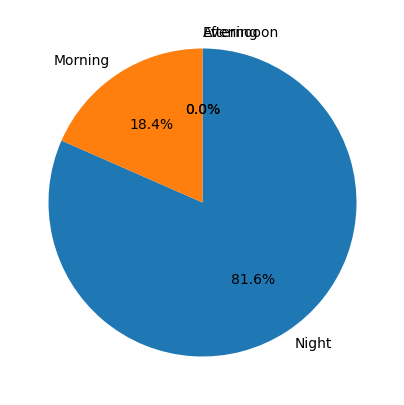

In [51]:
if 'admit_hour' in client_2.columns:
    hour_bins = pd.cut(client_2['admit_hour'], bins=[0, 6, 12, 18, 24],
                       labels=['Night', 'Morning', 'Afternooon', 'Evening'],
                       right=False)

    plot_pie_chart(hour_bins, figsize=(5, 5), filename="admission_c2.png")
else:
    print("Column 'admit_hour' not found.")

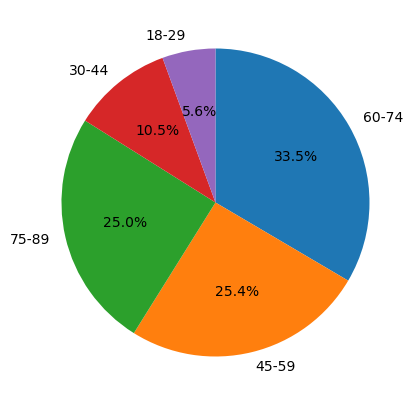

In [52]:
# Convert age to float safely
client_2['age'] = pd.to_numeric(client_2['age'], errors='coerce')

if 'age' in client_2.columns:
    # Ensure age is numeric
    client_2['age'] = pd.to_numeric(client_2['age'], errors='coerce')

    # Define age bins and labels
    age_bins = [18, 30, 45, 60, 75, float('inf')]
    age_labels = ['18-29', '30-44', '45-59', '60-74', '75-89']

    # Create age groups
    client_2['age_group'] = pd.cut(client_2['age'], bins=age_bins, labels=age_labels, right=False)

    # Call pie chart function
    plot_pie_chart(client_2['age_group'].dropna(), figsize=(5, 5), filename="age_c2.png")

else:
    print("Column 'age' not found.")